---
title: "Clustering"
format:
  html:
    code-fold: true
---


### Intro:

For clustering, I will be analyzing my spotify dataset. As I want my labels to be removed and my analysis to be numerical, my feature dataset includes:

- Danceability
- Energy: A metric of , loudness, and noise in a song.
- Loudness: A metric for the loudness; measured in decibels.
- Speechiness: A metric for the presence of speech- adjacent aspects in a recording.
- Acousticness: A metric denoting how acoustic the song was.
- Liveness: A metric concerning the level of an audience presence in the recording.
- Tempo: A metric of the estimated tempo of each song.
- Album Release Year: The release date of the specific album.

I removed all of my variables containing strings and specifically, the Valence variable:
- Artist Name: the creator of the particular song.
- Valence: A metric of musical positivity.
- Track Name: Another name for “song”. Shows the song name being analyzed.
- Album Name: The specific album to which the song belongs.

I removed Valence, due to it being the measure of overall positivity of a song. This feature in a dataset would represent what would influence listener choice, depending on their mood. Thus, I want to see how the Valence is distributed among Energy and Danceability– the variables of choice from my feature set.

### Theory:

K- Means: 

K- Means Clustering revolves around partitioning data. The “k” in k- Means signifies the amount of averages that will simultaneously represent the amount of clusters. This clustering method has k amount of means as the “centroid” points that the data points will gravitate to. The data points will naturally move closer and closer to the centroid with the least amount of distance between them.

The best way to approach k- Means is to recompute the algorithm over and over. This means you assign points to nearest centroid, then repeat. The data points will move closer and closer to its nearest centroid. The distance between the data points and each centroid are computed by looking  at the squared Euclidean distance between each point and the centroids.


DBSCAN:

DBSCAN stands for Density- Based Spacial Clustering of Applications with Noise. As the name suggests, DBSCAN is a clustering algorithm that clusters data points based on the densities they possess. Due to density being an indicator of how many data points are in a certain area, this technique is useful when wanting to look at high- density areas and, on the opposite end of the spectrum, outliers.

DBSCAN holds a few advantages. It is one technique that does not need to be given an input of clusters beforehand, as the algorithm will find them on its own. Also, DBSCAN will not only form its own clusters, but its own shapes of clusters of data points. Due to DBSCAN being able to identify data points that are too far away from a potential cluster and its ability to discover clusters that do not have a linear relationship, the technique is very popular in unsupervised learning.

Hierarchical Clustering: 

Hierarchical Clustering is a clustering technique that organizes data into growing partitions. There are two types of hierarchical clustering, one being Agglomerative, and the other being Division. Agglomerative Clustering starts off with the data points separated into as many partitions as possible and then are progressively combined with other clusters. Division Clustering is the opposite; the data is in one big cluster and is gradually separated into as many clusters as desired. 

Like DBSCAN, Hierarchical Clustering also does not need an input for the number of clusters, but finds them on their own. To see which data points have more similarity, for example in agglomerative clustering, you would examine which clusters are joined together earlier than others. This would mean their data points have less distance between them and are more likely to share behavior.

Model Selection:

Model selection is done through hyperparameter tuning (setting parameters before analysis). Two methods– the Elbow method and the Silhouette method– are used to find the optimal parameters to use. The Elbow method looks at the sum of squared distances between data points and tracks the expectedly exponential nature of the data as the number of clusters increases. This method is usually used for k- Means clustering.

The Silhouette method is used to determine how close clusters are to each other in similarity. The method assigns a score to clusters, -1 being the lowest score for inefficient clustering and +1 being the highest score for clearly separated clusters. The plot for the SIlhouette method presents a visual representation of how close each cluster is to the other.


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pandas as pd

In [13]:
spotifydf = pd.read_csv("../websitedata/spotify_py.csv")

spotifydf = spotifydf.drop(columns={"Unnamed: 0.1", "Unnamed: 0", "Artist Name", "Track Name", "Album Name"}, axis=1)
spotifyDF = spotifydf.drop(columns={"Valence"}) # Label (measures positivity) needs to be dropped
spotifyDF.head

<bound method NDFrame.head of      Danceability  Energy  Loudness  Speechiness  Acousticness  Liveness  \
0           0.864   0.556    -7.683       0.1940      0.255000    0.1120   
1           0.831   0.362    -6.085       0.2290      0.000156    0.1680   
2           0.804   0.656    -5.723       0.0896      0.020700    0.1070   
3           0.764   0.720    -6.494       0.2730      0.196000    0.1110   
4           0.854   0.808    -5.958       0.1390      0.019400    0.1080   
..            ...     ...       ...          ...           ...       ...   
388         0.638   0.259   -10.706       0.0898      0.753000    0.2190   
389         0.395   0.443    -9.720       0.1330      0.765000    0.0839   
390         0.695   0.575    -6.334       0.1160      0.198000    0.0614   
391         0.369   0.272   -10.497       0.0364      0.866000    0.1470   
392         0.443   0.298   -12.181       0.0644      0.388000    0.1030   

       Tempo  Album Release Year  
0     99.974          

In [14]:
X = spotifyDF 
y = spotifydf["Valence"] 

print(X.shape, y.shape)
X = np.ascontiguousarray(X)

(393, 8) (393,)


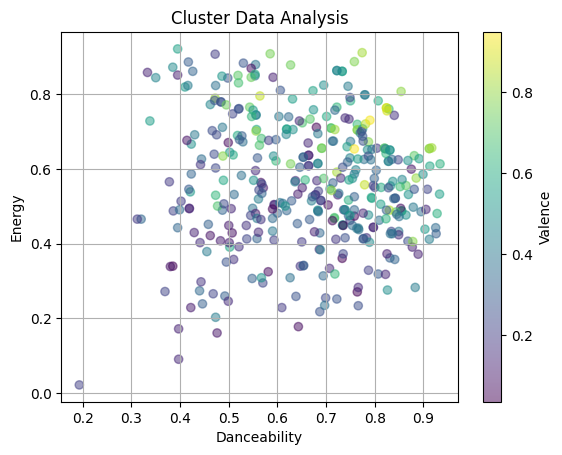

In [15]:
# UTILITY PLOTTING FUNCTION
def plot(X,y):
    fig, ax = plt.subplots()
    XPlot = ax.scatter(X[:,0], X[:,1],c=y, alpha=0.5) 
    ax.set(xlabel="Danceability", ylabel="Energy",
    title="Cluster Data Analysis")
    ax.grid()
    # fig.savefig("test.png")
    plt.colorbar(XPlot, label="Valence")
    plt.show()

plot(X,y)

In [16]:
# HYPERPARAMETER TUNING
import sklearn.cluster
import warnings
warnings.filterwarnings("ignore")


# THIS WILL ITERATE OVER ONE HYPER-PARAMETER (GRID SEARCH)
# AND RETURN THE CLUSTER RESULT THAT OPTIMIZES THE SILHOUETTE SCORE
def maximize_silhouette(X,algo="ag",nmax=20,i_plot=False):

    # PARAM
    i_print=False

    #FORCE CONTIGUOUS
    X=np.ascontiguousarray(X)

    # LOOP OVER HYPER-PARAM
    params=[]; sil_scores=[]
    sil_max=-10
    for param in range(2,nmax+1):
        if(algo=="ag"):
            model = sklearn.cluster.AgglomerativeClustering(n_clusters=param).fit(X)
            labels=model.labels_

        if(algo=="dbscan"):
            param=0.25*(param-1)
            model = sklearn.cluster.DBSCAN(eps=param).fit(X)
            labels=model.labels_

        if(algo=="kmeans"):
            model = sklearn.cluster.KMeans(n_clusters=param).fit(X)
            labels=model.predict(X)

        try:
            sil_scores.append(sklearn.metrics.silhouette_score(X,labels))
            params.append(param)
        except:
            continue

        if(i_print): print(param,sil_scores[-1])

        if(sil_scores[-1]>sil_max):
             opt_param=param
             sil_max=sil_scores[-1]
             opt_labels=labels

    print("OPTIMAL PARAMETER =",opt_param)

    if(i_plot):
        fig, ax = plt.subplots()
        ax.plot(params, sil_scores, "-o")
        ax.set(xlabel='Hyper-parameter', ylabel='Silhouette')
        plt.show()

    return opt_labels

OPTIMAL PARAMETER = 2


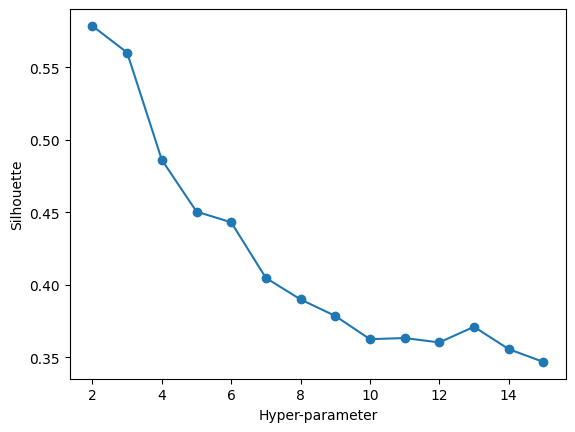

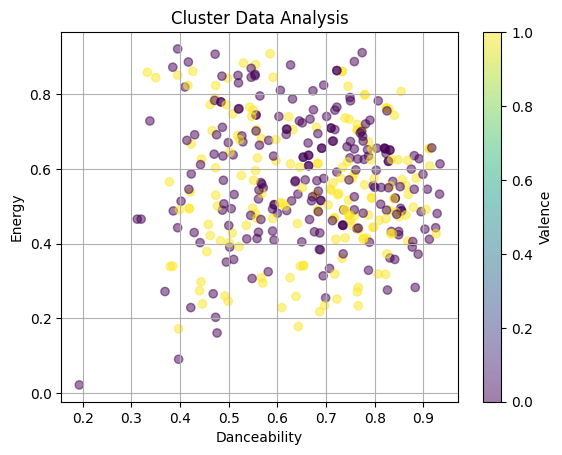

In [17]:
# KMEANS
opt_labels=maximize_silhouette(X,algo="kmeans",nmax=15, i_plot=True)
plot(X,opt_labels)


OPTIMAL PARAMETER = 2


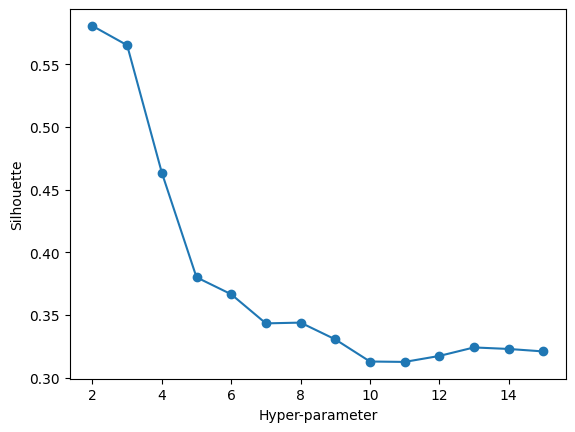

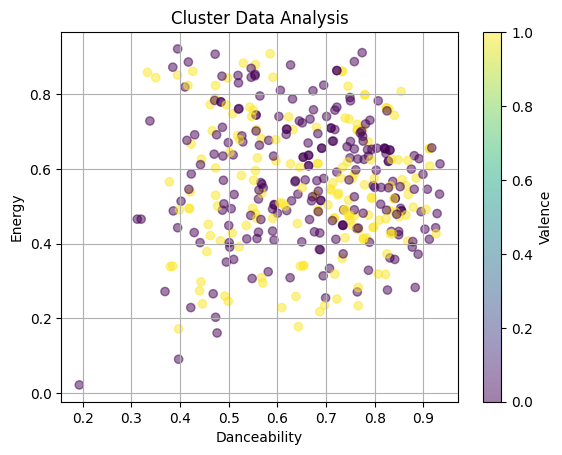

In [18]:
# AGGLOMERATIVE CLUSTERING
opt_labels=maximize_silhouette(X,algo="ag",nmax=15, i_plot=True)
plot(X,opt_labels)

OPTIMAL PARAMETER = 3.5


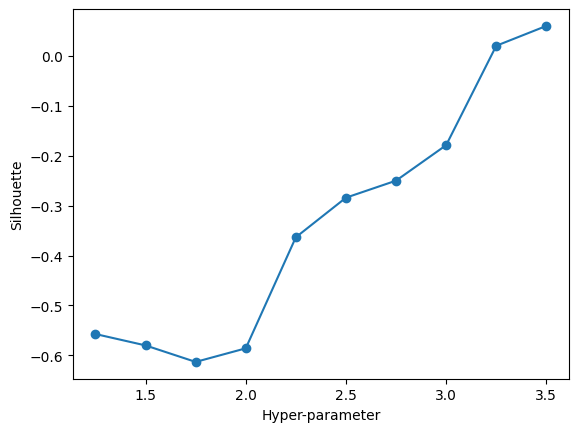

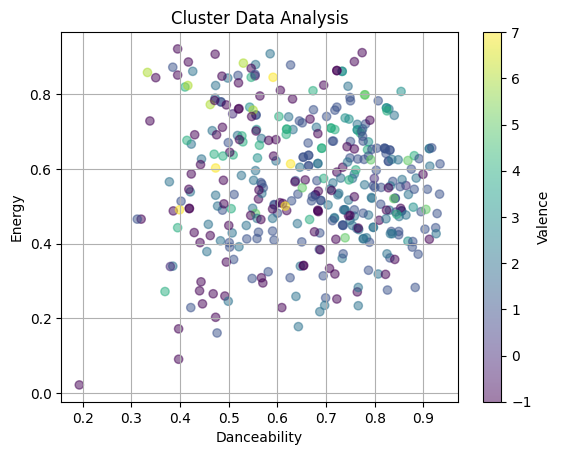

In [19]:
# DBSCAN
opt_labels=maximize_silhouette(X,algo="dbscan",nmax=15, i_plot=True)
plot(X,opt_labels)

### Final Analysis

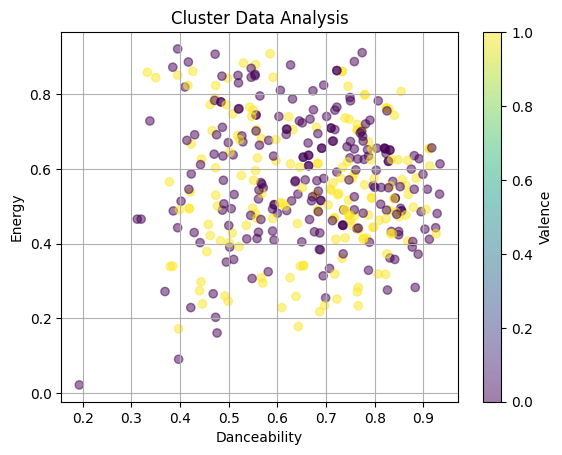

In [20]:
# KMEANS
model = sklearn.cluster.KMeans(n_clusters=2).fit(X)
labels=model.predict(X)
plot(X,labels)

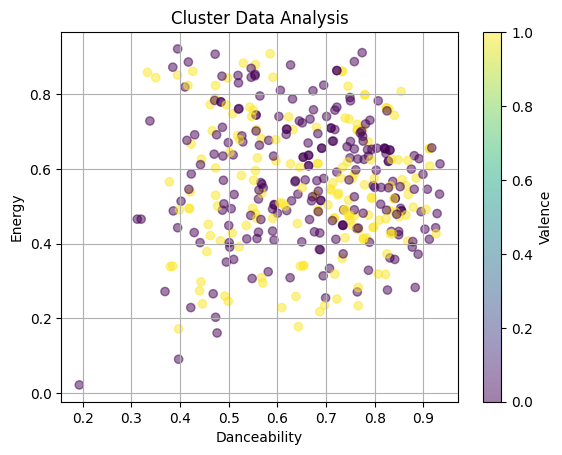

In [21]:
# AGGLOMERATIVE CLUSTERING
model = sklearn.cluster.AgglomerativeClustering(n_clusters=2).fit(X)
labels=model.labels_
plot(X,labels)

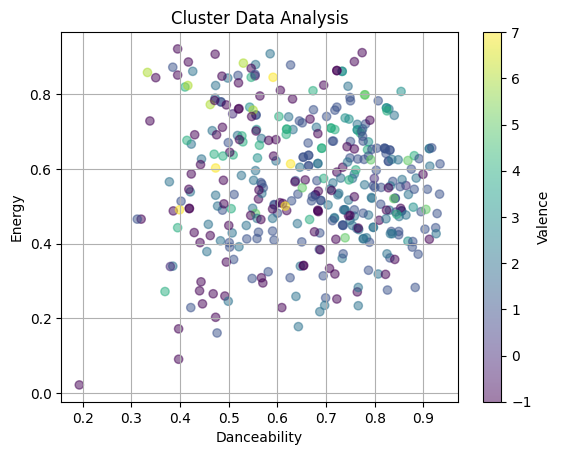

In [22]:
# DBSCAN 
model = sklearn.cluster.DBSCAN(eps=3.5).fit(X)
labels=model.labels_
plot(X,labels)

### Results

My optimal parameter for the k- Means clustering and the Hierarchical Agglomerative clustering was 2 clusters, whereas it was 3.5 for DBSCAN. I believe DBSCAN did a better job at showing a relationship between the variables due to me getting a more detailed view of the clusters. As seen in the final DBSCAN, the lower the Energy and Danceability, the lower the Valence. However, it seems Valence tends to be highest at the middle point of Danceability and the higher end of Energy.
